These are some methods for uniformly random sampling in and on some common shapes including circles and spheres.

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import uniform,standard_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Uniform sampling on a line
I will assume that we have access to a 1D uniform distribution sampling function and a 1D normal distribution sampling function. So, uniform sampling on a line becomes trivial by mapping the line to $[0,1]$. Then uniformly random draws from $[0,1]$ can be mapped back to the line.

# Uniform sampling in a Triangle
We plot a triangle to begin with and then generate $N=1000$ uniformly distributed random points inside it. 

$P = (1 - \sqrt{r_1}) A + (\sqrt{r_1} (1 - r_2))  B + (r_2 \sqrt{r_1}) C$ where $r_1, r_2 \sim U[0, 1]$ gives us the required sampling.[[src](https://math.stackexchange.com/questions/18686/uniform-random-point-in-triangle)]

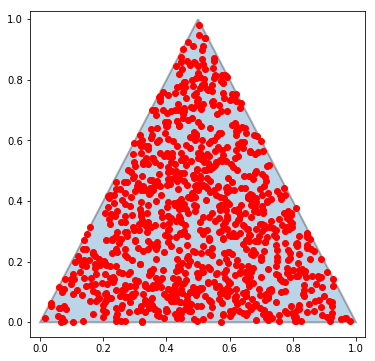

In [2]:
N=1000
verts=np.asarray([[0,0],[0.5,1],[1,0]])
fig,ax=plt.subplots(figsize=[6,6])
_=ax.add_artist(plt.Polygon(verts,alpha=0.3,lw=2,ec='k'))

p1 = np.sqrt(uniform(0,1,N)) # taking sqrt here itself
p2 = uniform(0,1,N)

ts=np.empty([N,2])
ts[:,0] = (1-p1)*verts[0,0] + p1*(1-p2)*verts[1,0] + p2*p1*verts[2,0]
ts[:,1] = (1-p1)*verts[0,1] + p1*(1-p2)*verts[1,1] + p2*p1*verts[2,1]
_=ax.plot(ts[:,0],ts[:,1],'ro')

An alternative solution is to form a parallellogram using two sides and 

# Uniform sampling in a Square

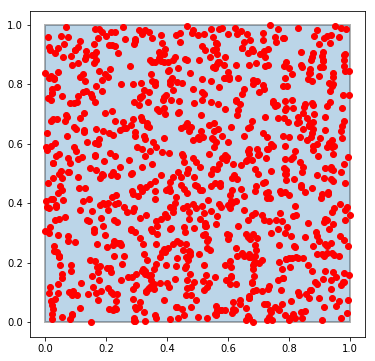

In [3]:
N=1000
verts=np.asarray([[0,0],[0,1],[1,1],[1,0]])
fig,ax=plt.subplots(figsize=[6,6])
_=ax.add_artist(plt.Polygon(verts,alpha=0.3,lw=2,ec='k'))

u1 = uniform(0,1,N)
u2 = uniform(0,1,N)

_=ax.plot(u1,u2,'ro')

# Uniform sampling inside a circle

## Naive [WRONG] procedure
We want to generate $N$ random points inside the circle, such that they are distributed with an equal density.  Using polar coordinates, $r$ and $\theta$, any point inside a circle or radius $r_0$ can be represented as

$$(x,y)=(r~cos(\theta),r~sin(\theta))$$ for $$r\in[0,r_0],~\theta\in[0,2\pi] $$

The naive approach is to randomly pick $N$ values each of $r\in[0,r_0]$ and a $\theta\in[0,2\pi]$ and calculate $x$ and $y$. As we shall see this does not give us a uniform distribution inside the circle. Lets say $N=1000$ and $r_0=2$.

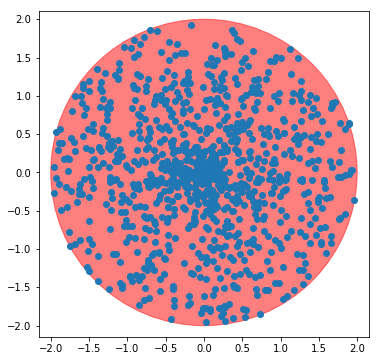

In [4]:
r0 = 2.0
N  = 1000

r  = r0*uniform(0,1,N)
t  = uniform(0,2*np.pi,N)

x,y= r*np.cos(t),r*np.sin(t)

fig,ax=plt.subplots(figsize=(6,6))
ax.add_artist(plt.Circle((0, 0), r0, color='r',alpha=0.5))
ax.plot(x,y,'o')
ax.set_aspect('equal')

Clearly, we do not get a uniform distribution of points in the cirle this way. The points are clustered near the center.

## Best procedure
Take a step back and see why this went wrong. Lets say we already have a uniform sampling inside the circle, then on integrating over theta we would find the the density along $r$ is not constant (i.e not uniform). In fact, the density at any point would be proportional to the value of $r$ at that point. This means drawing $r$ from a uniform distribution was not right. We need to draw $r$ from a distribution that starts at 0 and increases linearly till $r=r_0$. Now that we know this, we can use the **Inverse transform sampling** procedure to draw from the correct distribution. For this to work, we need to integrate the $PDF$ to get the $CDF$ and then invert the $CDF$. Applying the inverse of the CDF on a uniformly sampled random variable will give us draws from the $PDF$ that we need. Given a continuous uniform variable $ U$ in $ [0,1]$ and an invertible cumulative distribution function $F_{X}$, the random variable $X=F_{X}^{-1}(U)$ has distribution $F_{X}$.[[*](https://en.wikipedia.org/wiki/Inverse_transform_sampling)].

In this particular case the $PDF=\frac{1}{r_0}\int{2r}dr$ and $CDF=r^2$ and so $CDF^{-1}(x)=x^{\frac{1}{2}}$. So, for the radius we draw uniform samples again but this time instead of using it directly, we take square-root. Alternative way to think about this is to imagine that we are taking uniform samples for $r^2$ from $[0,r_0^2]$.

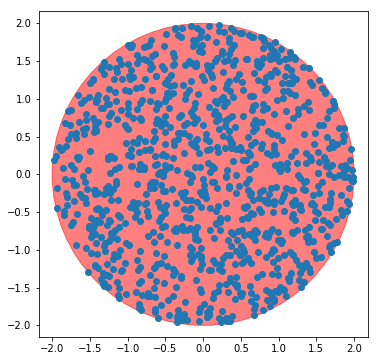

In [5]:
r  = r0*np.sqrt(uniform(0,1,N))
t  = uniform(0,2*np.pi,N)
#################################
x,y= r*np.cos(t),r*np.sin(t)
fig,ax=plt.subplots(figsize=(6,6))
ax.add_artist(plt.Circle((0, 0), r0, color='r',alpha=0.5))
ax.plot(x,y,'o')
ax.set_aspect('equal')

This looks uniform now. This probably the best and most efficient way for sampling inside a circle. It needed $2N$ samples total. 

## Alternative procedure
There is an alternative way to sample the "linear" probability distribution, without going the inverse transform sampling route. This needs two independent draws from a uniform distribution for the radius (i.e. three draws total). First, we add the two draws. The resulting points look like they have been drawn from a distribution that looks like a hat function with a peak at $r_0$ and domain from $0$ to $2r_0$. 'Folding back' the portion in $[r_0,2r_0]$ onto $[0,r_0]$, we get our linearly increasing distribution.

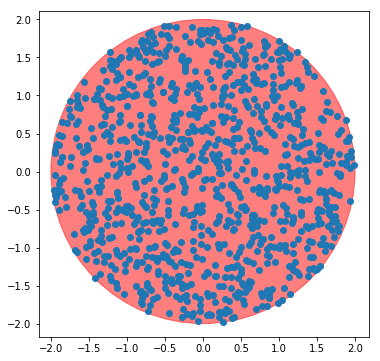

In [6]:
x1 = uniform(0.0,r0,N)
x2 = uniform(0.0,r0,N)
r  = x1+x2
r  = r0-np.abs(r-r0)# same as r=2*r0-r if r>r0 else r

########################################
x,y= r*np.cos(t),r*np.sin(t)
fig,ax=plt.subplots(figsize=(6,6))
ax.add_artist(plt.Circle((0, 0), r0, color='r',alpha=0.5))
ax.plot(x,y,'o')
ax.set_aspect('equal')

This looks alright as well. But, we needed to draw $3N$ samples.

## Rejection Sampling Procedure
This is a general alternative procedure to get uniform density in various circumstances. First, uniform samples in the square region $[-r_0,r_0]\times[-r_0,r_0]$ are drawn. Then, only the samples that fall inside the circle are kept. This is repeated until we have the necessary number of samples. 

Total number of samples drawn: 2516


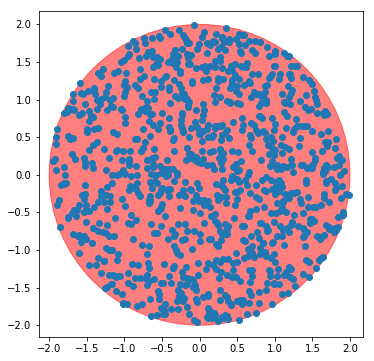

In [7]:
x=[]
y=[]
r0square=r0**2
ns=0
k=0
while(ns<N):
    k+=1  
    xp = uniform(-r0,r0,1)
    yp = uniform(-r0,r0,1)
    if (xp**2+yp**2) < r0square:#acceptable
        x.append(xp)
        y.append(yp)
        ns+=1
    
########################################
fig,ax=plt.subplots(figsize=(6,6))
ax.add_artist(plt.Circle((0, 0), r0, color='r',alpha=0.5))
ax.plot(x,y,'o')
ax.set_aspect('equal')
print('Total number of samples drawn:',2*k)

Unlike the previous methods, number of draws needed for this method is not known apriori. This is very simple to program easily extendable to 3D and different shapes like ellipses and ellipsoids for instance.

# Sampling on a sphere
Sampling 'on a circle' is trivial. We can draw from a uniform distribution in $[0,2\pi]$. This is the same as generating random directions or randomly oriented vectors in 2D world. The same in 3D  is less clear. Generating a uniform sampling on the surface of a sphere is the same as generating uniformly randomly oriented vectors in 3D space. This is different from randomly rotating a 3d object. A vector does not change when rotated about itself, whereas a general 3d object would.

## Naive [WRONG] method
The surface of a sphere can be parametrized in $\theta$ and $\phi$. Lets see what we get when we naively sample these two from a uniform distribution. We'll take it to be a unit sphere.

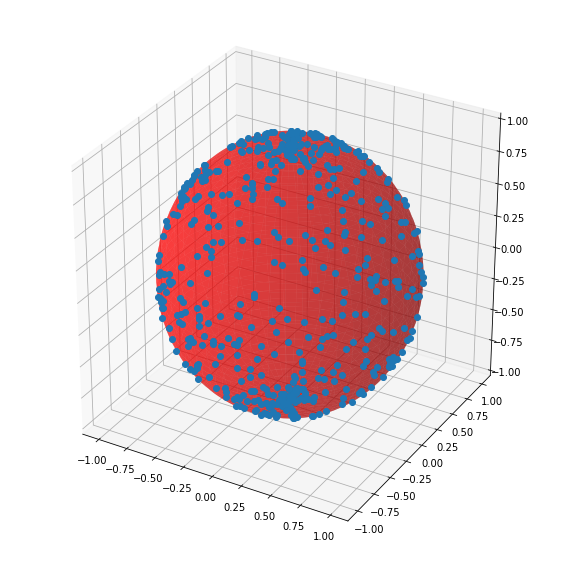

In [8]:
N=500
phi   = np.random.uniform(0,2*np.pi,size=N)
theta = np.random.uniform(0,2*np.pi,size=N)

st=np.sin(theta)
ct=np.cos(theta)
sp=np.sin(phi)
cp=np.cos(phi)

v=np.c_[st*cp,st*sp,ct]

fig,ax=plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot(v[:,0],v[:,1],v[:,2],'o')
ax.set_aspect('equal')

# Make spherical surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x =  np.outer(np.cos(u), np.sin(v))
y =  np.outer(np.sin(u), np.sin(v))
z =  np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
collection=ax.plot_surface(x, y, z, color='r',alpha=0.5)


We see points clustering at the poles, similar to what was seen with the naive sampling of the circles. To fix this we can do inverse transform sampling of theta as shown below. 

## Inverse transform Sampling
When a sphere is sliced along the latitudes(i.e. with parallel planes), the area of the slice does not depend on the latitude. This means that $z\in[-1,1]$ and $\phi\in[0,2\pi]$ can be picked from uniformly. Using which we can calculate $x$ and $y$ to get all three coordinates. The arc cosine function takes in a uniform sampling in $[-1,1]$ to give the right spread for theta

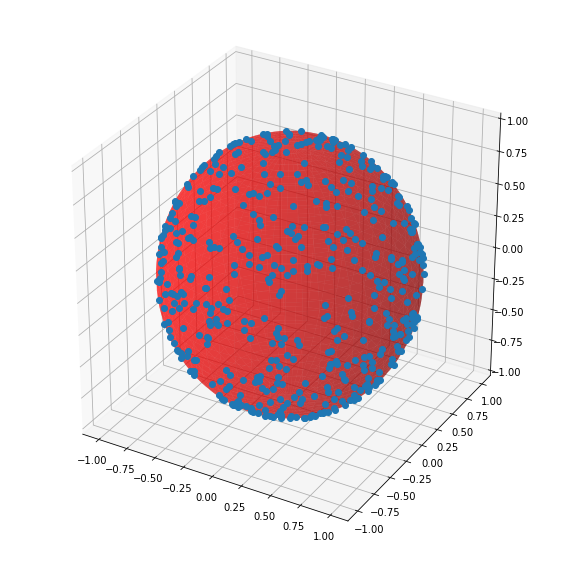

In [9]:
N=500
phi   = uniform(0,2*np.pi,size=N)
theta = np.arccos(uniform(-1,1,size=N))

st=np.sin(theta)
ct=np.cos(theta)
sp=np.sin(phi)
cp=np.cos(phi)

pts=np.c_[st*cp,st*sp,ct]

fig,ax=plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot(pts[:,0],pts[:,1],pts[:,2],'o')
ax.set_aspect('equal')

# For Visualization, make spherical surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x =  np.outer(np.cos(u), np.sin(v))
y =  np.outer(np.sin(u), np.sin(v))
z =  np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
collection=ax.plot_surface(x, y, z, color='r',alpha=0.5)

## From normal distribution
In this method we first get points(in 3D space) by independently drawing the x,y,z coordinates for each point from a normal distribution. The resulting points will be spherically symmetric. We then normalize the position vectors so that the points lie on a sphere. The resulting distribution will be uniform on a sphere.


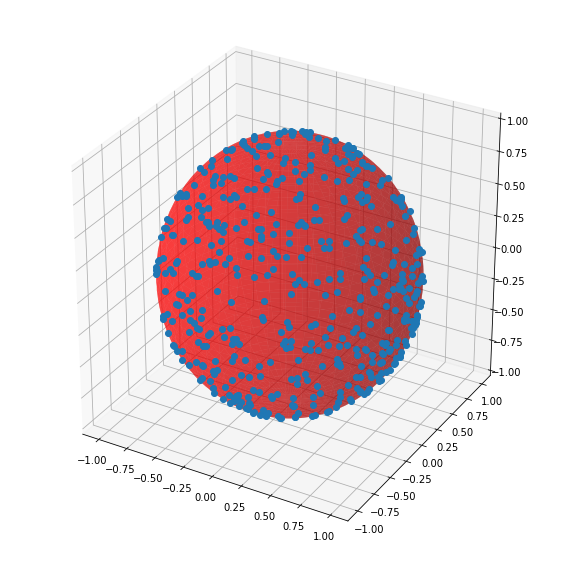

In [10]:
pts=standard_normal(size=[N,3])          #get 3 N-length values
pts/=np.sqrt(np.sum(pts**2,axis=-1)[:,np.newaxis])   #normalize: v=v/|v|

fig,ax=plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot(pts[:,0],pts[:,1],pts[:,2],'o')
ax.set_aspect('equal')

# For Visualization, make spherical surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x =  np.outer(np.cos(u), np.sin(v))
y =  np.outer(np.sin(u), np.sin(v))
z =  np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
collection=ax.plot_surface(x, y, z, color='r',alpha=0.5)

## Marsaglia's Method

**Choosing a point from the surface of sphere**, George Marsaglia 1972, *The Annals of Mathematical Statistics, vol. 43, No. 2, 645 - 646.*

From the paper:
>Generate $V_1$ and $V_2$ independent uniform on (-1,1) until $S= V_1^2+ V_2^2<1$ then form $(~2V_1(1-S)^{1/2}~,~2V_2(1-S)^{1/2}~,~1-2S~)$

Essentially we first generate uniform random samples on disk($\equiv$ inside a circle) and then transform them as prescribed to get points on a sphere. To generate the points on a disk, instead of rejection sampling as described, we will use the 'best method' described earlier. 

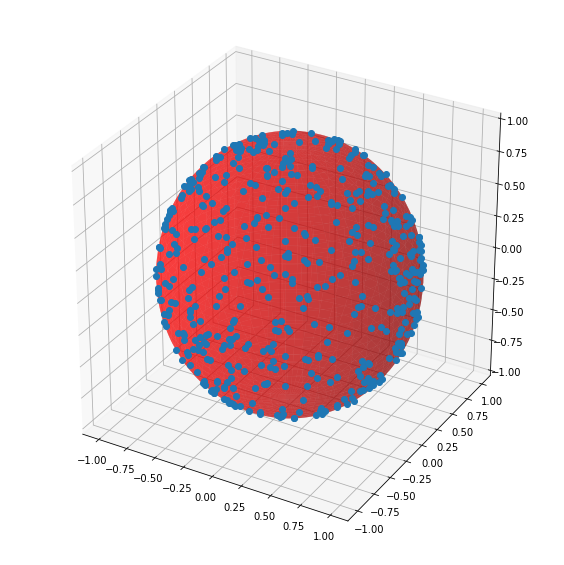

In [19]:
N=500
r     = np.sqrt(uniform(0.0,1.0,N))
t     = uniform(0,2*np.pi,N)

v1,v2 = r*np.cos(t),r*np.sin(t)
s     = v1**2+v2**2 
pts   = np.c_[2*v1*(np.sqrt(1-s)),2*v2*(np.sqrt(1-s)),1-2*s]

fig,ax=plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot(pts[:,0],pts[:,1],pts[:,2],'o')
ax.set_aspect('equal')

# For Visualization, make spherical surface
u =  np.linspace(0, 2 * np.pi, 100)
v =  np.linspace(0, np.pi, 100)
x =  np.outer(np.cos(u), np.sin(v))
y =  np.outer(np.sin(u), np.sin(v))
z =  np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
collection=ax.plot_surface(x, y, z, color='r',alpha=0.5)

## Using quaternions
A [Quaternion](https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation) is a set of 4 numbers represented as $(w,x,y,z)$ or $w+x~i+y~j+z~k$. This is an extension of complex numbers to 3D space. $i,j,k$ are imaginary numbers such that $i^2=j^2=k^2=ijk=-1$. The $i,j,k$ do not commute($ijk\neq ikj$). Quaternions can be used to rotate vectors in 3D space. A vector in 3D space can be rotated to a general position by rotating it about each of three axis in succession. This operation does not commute as well. However, it turns out that any rotated position can be obtained by rotating the original vector by a particular angle about a particular axis. This is the axis-angle specification of a rotation. Quaternion is an alternative to the axis-angle method to represent rotations.

Choose three points  $u_1,u_2,u_3 \in [0,1]$ uniformly at random. A uniform, random quaternion is given by the simple expression $h = (\sqrt{1-u_1}\sin 2 \pi u_2, \sqrt{1-u_1}\cos 2 \pi u_2, \sqrt{u_1}\sin 2 \pi u_3, \sqrt{u_1}\cos 2 \pi u_3)$. (K. Shoemake. Uniform random rotations. D. Kirk, editor, Graphics Gems III, pages 124-132. Academic, New York, 1992)

In [12]:
u1 = uniform(0.0,1.0,N)
u2 = uniform(0.0,1.0,N)
u3 = uniform(0.0,1.0,N)
rnd_quats=np.c_[np.sqrt(1-u1)*np.sin(2*np.pi*u2), np.sqrt(1-u1)*np.cos(2*np.pi*u2),
                np.sqrt( u1 )*np.sin(2*np.pi*u3), np.sqrt( u1 )*np.cos(2*np.pi*u3) ]

Now that we have the random quaternions, we can generate the needed points by applying the quaternions to a reference position vector. I will choose $[1,0,0]$. To maintain the uniformity of the distribution each quaternion has to be applied to the same reference vector, which in this case is $[1,0,0]$. The actual rotation is done by multiplying the vector with a transformation matrix that is generated from the quaternion. The function below gives us the rotation matrix for a given quaternion.

In [13]:
def rotation_matrix_q(q):
    """Returns rotation matrix from quaternion.
    """
    q *= np.sqrt(2.0 / (q @ q))
    q = np.outer(q, q)
    return np.asarray([
           [1.0-q[2, 2]-q[3, 3],     q[1, 2]-q[3, 0],     q[1, 3]+q[2, 0]],
           [    q[1, 2]+q[3, 0], 1.0-q[1, 1]-q[3, 3],     q[2, 3]-q[1, 0]],
           [    q[1, 3]-q[2, 0],     q[2, 3]+q[1, 0], 1.0-q[1, 1]-q[2, 2]],])


Now we can rotate the the reference vector by

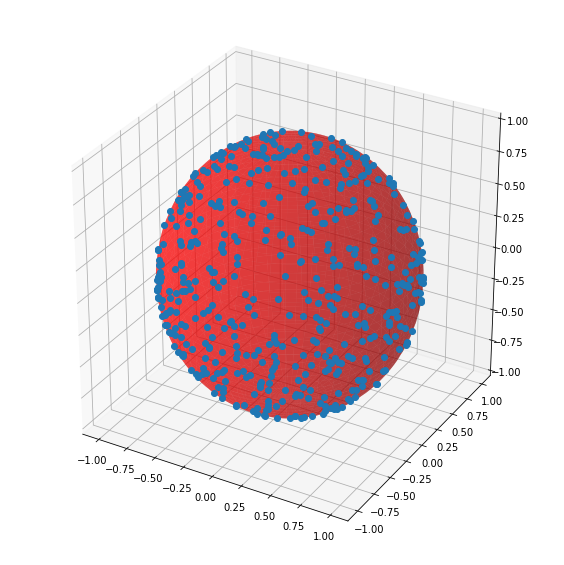

In [14]:
ref_v=np.asarray([1.0,0.0,0.0])
pts=np.empty([N,3])
for i,q in enumerate(rnd_quats):
    rot_mat = rotation_matrix_q(q)  
    pts[i]  = rot_mat.dot(ref_v.T).T
fig,ax=plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot(pts[:,0],pts[:,1],pts[:,2],'o')
ax.set_aspect('equal')

# For Visualization, make spherical surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x =  np.outer(np.cos(u), np.sin(v))
y =  np.outer(np.sin(u), np.sin(v))
z =  np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
collection=ax.plot_surface(x, y, z, color='r',alpha=0.5)

The following shows how we can get the rotation matrix for rotating a one vector to another

In [15]:
def rotation_matrix_aa(axis,angle):
    """Returns matrix for rotation by 'angle' radians about 'axis' through the origin
    """
    axis/=np.sqrt(np.sum(axis**2))
    l,m,n = axis
    sina,cosa=np.sin(angle),np.cos(angle)
    return  np.asarray([
            [ l*l*(1-cosa)+  cosa , l*m*(1-cosa)+n*sina , l*n*(1-cosa)-m*sina ],
            [ m*l*(1-cosa)-n*sina , m*m*(1-cosa)+  cosa , m*n*(1-cosa)+l*sina ],
            [ n*l*(1-cosa)+m*sina , n*m*(1-cosa)-l*sina , n*n*(1-cosa)+  cosa ]])

In [16]:
angle=np.arccos(np.dot(ref_v,pts[5]))
axis=np.cross(pts[5],ref_v)
rot_mat=rotation_matrix_aa(axis,angle)
print(rot_mat)

[[-0.38367865 -0.42481845  0.8199512 ]
 [ 0.42481845  0.70718081  0.56517659]
 [-0.8199512   0.56517659 -0.09085947]]


# References
- [Christoph Gohlke -- Transformations.py](https://www.lfd.uci.edu/~gohlke/code/transformations.py.html)
- [SO -- Circle Uniform Sampling](https://stackoverflow.com/questions/5837572/generate-a-random-point-within-a-circle-uniformly)
- [SO -- Sphere volume sampling](https://stackoverflow.com/a/5408843)
- [Math.SE -- surface of sphere](https://math.stackexchange.com/q/442418)
- [Wolfram Sphere Point Picking](http://mathworld.wolfram.com/SpherePointPicking.html)